In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3785060c02c54dbaad1176657f2f5e30 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='y28Q3epLMOQd3qK8iMR3OePZs528azjYDsoR3lwc6QhT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3785060c02c54dbaad1176657f2f5e30.get_object(Bucket='diabeticmellitusprediction-donotdelete-pr-m15oy1v9yn1rph',Key='datasets_26789_34175_pima-indians-diabetes.data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

ds = pd.read_csv(body)



In [26]:
ds.corr()

,preg,plas,pres,Skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [27]:
import seaborn as sns

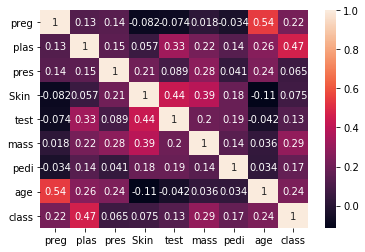

In [28]:
sns.heatmap(ds.corr(),annot=True)

In [29]:
x = ds.iloc[:,0:8].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [30]:
x.shape

(768, 8)

In [31]:
y = ds.iloc[:,8:].values
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [32]:
y.shape

(768, 1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
x_train

array([[7.00e+00, 1.50e+02, 7.80e+01, ..., 3.52e+01, 6.92e-01, 5.40e+01],
       [4.00e+00, 9.70e+01, 6.00e+01, ..., 2.82e+01, 4.43e-01, 2.20e+01],
       [0.00e+00, 1.65e+02, 9.00e+01, ..., 5.23e+01, 4.27e-01, 2.30e+01],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 0.00e+00, 6.40e-01, 6.90e+01]])

In [36]:
x_test

array([[1.000e+00, 1.990e+02, 7.600e+01, ..., 4.290e+01, 1.394e+00,
        2.200e+01],
       [2.000e+00, 1.070e+02, 7.400e+01, ..., 3.360e+01, 4.040e-01,
        2.300e+01],
       [4.000e+00, 7.600e+01, 6.200e+01, ..., 3.400e+01, 3.910e-01,
        2.500e+01],
       ...,
       [4.000e+00, 1.420e+02, 8.600e+01, ..., 4.400e+01, 6.450e-01,
        2.200e+01],
       [3.000e+00, 1.160e+02, 7.400e+01, ..., 2.630e+01, 1.070e-01,
        2.400e+01],
       [1.000e+00, 1.070e+02, 7.200e+01, ..., 3.080e+01, 8.210e-01,
        2.400e+01]])

In [37]:
plt.plot(x_test,y_test)

NameError: name 'plt' is not defined

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logr = LogisticRegression()

In [40]:
logr.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
y_pred = logr.predict(x_test)

In [42]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [43]:
y_pred.reshape(154,1)

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,y_pred)

0.8181818181818182

In [49]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [50]:
wml_credentials={
  "apikey": "8kckkDVZaIpQGo-3m7iGJDAOPTsjWDpObqKbI3lSHgfO",
  "iam_apikey_description": "Auto-generated for key 618cb8a7-b90a-4578-96d4-4b205c0c16cb",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/ffac827ee01241978d773e0826b0654f::serviceid:ServiceId-6135e07d-3105-40ac-a930-4999d1b28d7e",
  "instance_id": "e4a56cc8-4b33-46fd-9afb-73605edf54d4",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [51]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [53]:
metadata={
    client.repository.ModelMetaNames.DESCRIPTION:'diabetic_mellitus',
    client.repository.ModelMetaNames.AUTHOR_NAME:'shreshth',
    client.repository.ModelMetaNames.NAME:'logistic_regression',
    client.repository.ModelMetaNames.FRAMEWORK_NAME:"scikit-learn",
    client.repository.ModelMetaNames.FRAMEWORK_VERSION:"0.22.1"
}

In [54]:
model_details=client.repository.store_model(logr,meta_props=metadata)

In [55]:
published_model_uid=client.repository.get_model_uid(model_details)

In [56]:
published_model_uid

'fb10cfc0-b940-41ed-b387-4d38e3ee69cb'

In [57]:
created_deployment=client.deployments.create(published_model_uid,name='LGR')



#######################################################################################

Synchronous deployment creation for uid: 'fb10cfc0-b940-41ed-b387-4d38e3ee69cb' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='58bf8039-08e0-459b-bb9c-a9fd5b561971'
------------------------------------------------------------------------------------------------




In [58]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/e4a56cc8-4b33-46fd-9afb-73605edf54d4/deployments/58bf8039-08e0-459b-bb9c-a9fd5b561971/online'

In [59]:
client.deployments.list()

------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME  TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
58bf8039-08e0-459b-bb9c-a9fd5b561971  LGR   online  DEPLOY_SUCCESS  2020-07-02T05:43:38.779Z  scikit-learn-0.20  model
------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
